In [1]:
##Ben Pelto June 14, 2019
#plot inversion thicknesses for SRTM and Lidar DEMs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = '/home/pelto/Desktop/lidar_cbt_analysis/Ba/'
f_in = 'srtm_lidar.csv' 

data = pd.read_csv(path + f_in)

markers = ('o', 's', 'D', '^', 'v', 'p') #, 'o', 's', 'D', '^', 'v', 'p', 'o', 's', 'D', '^', 'v', 'p', 's', 'v')

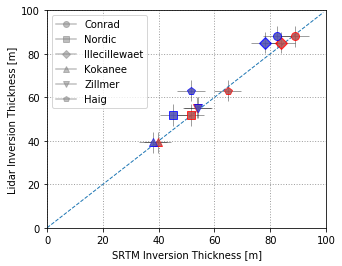

In [2]:
# Create plot
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1) 
x,y,xerr,yerr=data['srtm_inv_raw'], data['lidar_inv'], data['srtm_err'],data['lidar_err']

for x, y, xerr, yerr, marker in zip(data['srtm_inv_raw'], data['lidar_inv'],
                                    data['srtm_err'], data['lidar_err'], markers):
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, alpha=0.75, c='red', ecolor='k', elinewidth=0.5,
                marker=marker, label=None, markersize='8')
z = 1

for x, y, xerr, yerr, site, marker in zip(data['srtm_inv_raw'], data['lidar_inv'],
                                          data['srtm_err'], data['lidar_err'],
                                          data['name'], markers):
    ax.errorbar(x, y, marker=marker, color='grey', alpha=0.5, label=site, elinewidth=0.25)
    z += 1
    if z >= 7:
        break
        
plt.legend(loc=2)

for x, y, xerr, yerr, marker in zip(data['srtm_inv_corr'], data['lidar_inv'],
                                    data['srtm_err'], data['lidar_err'], markers):
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, alpha=0.75, c='blue', ecolor='k', elinewidth=0.5,
                marker=marker, label=None, markersize='8')
z = 1

for x, y, xerr, yerr, site, marker in zip(data['srtm_inv_corr'], data['lidar_inv'],
                                          data['srtm_err'], data['lidar_err'],
                                          data['name'], markers):
    ax.errorbar(x, y, marker=marker, color='grey', alpha=0.5, label=site, elinewidth=0.25)
    z += 1
    if z >= 7:
        break
        
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot(np.arange(0, 100), np.arange(0, 100), '--', linewidth=1)

plt.grid(linestyle=':', linewidth=1, color='gray', alpha=0.75, zorder=5)
plt.xlabel('SRTM Inversion Thickness [m]')
plt.ylabel('Lidar Inversion Thickness [m]')
plt.savefig(path + 'SRTM_Lidar_inversion_comp.png', dpi=600)
plt.show()